# 📊 Parcial – Análisis estratégico de reseñas de Amazon con ayuda de ChatGPT

**Curso:** Análisis de Redes Sociales

**Caso de negocio:**
Una empresa de tecnología está evaluando lanzar una nueva línea de accesorios para móviles. Para ello, necesita analizar las opiniones de los usuarios sobre productos similares en Amazon. Tu rol es analizar las reseñas disponibles y brindar conclusiones útiles para tomar decisiones estratégicas.

Debes usar ChatGPT para clasificar las reseñas en dos dimensiones:
`review_content`
- Sentimiento: Muy negativo, Negativo, Neutro, Positivo, Muy positivo
- Tema (Motivo): Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro

Además para su analisis tiene la columna Category y Rating. Category hace referencia al producto y Rating a la calificacion del cliente.

*Tiene estas preguntas guias disponibles que tiene que comparar pero puede añadir heatmaps, worldcloud, comparaciones y graficos.

A partir de estas clasificaciones, realizarás análisis visuales, identificarás patrones y redactarás recomendaciones accionables.

In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
!unzip amazon.csv.zip

--2025-06-07 15:18:15--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-07 15:18:16--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.07s   

In [2]:
import pandas as pd
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
df["clean_product_name"] = df["product_name"].apply(lambda x: x.split("|")[0])

In [6]:
df.shape

(1465, 17)

## 🧪 Preguntas a desarrollar paso a paso

### 1. Inspección y limpieza de la base de datos
- ¿Qué columnas son útiles para este análisis?
- ¿Cómo podrías limpiar los valores nulos o inconsistentes?
- Extrae el primer nivel de categoría del producto.

Columna	-¿Por qué es útil?
product_id - Para identificar el producto
product_name - Para saber qué es (cable, cargador, etc.)
category - Para clasificar por tipo de producto
rating - Te da una idea del sentimiento (opcional)
review_content - ChatGPT
review_title - entender el sentimiento
rating_count - cuántas personas han calificado

In [7]:
df = df.dropna(subset=["review_content"])
df = df.drop_duplicates(subset=["review_id"])
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

Para este análisis, son utiles las columnas: product_id, product_name, category, rating, review_title, review_content y rating_count, ya que permiten identificar el producto, analizar su recepción y agrupar por tipo.

Se eliminaron valores nulos en review_content, se estandarizó el tipo de dato en rating, se eliminaron duplicados por review_id y se completaron títulos vacíos con "Sin título".

In [8]:
df["main_category"] = df["category"].apply(lambda x: x.split(">")[0].strip())

### 2. Exploración preliminar
- ¿Cómo se distribuyen las calificaciones (`rating`)?
- ¿Cuáles son las 10 categorías con más reseñas?
- ¿Qué productos tienen mayor número de reseñas?

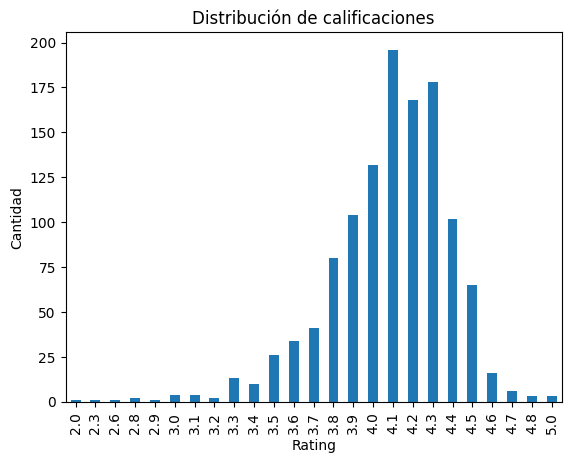

In [9]:
import matplotlib.pyplot as plt

df["rating"].value_counts().sort_index().plot(kind="bar", title="Distribución de calificaciones", xlabel="Rating", ylabel="Cantidad")
plt.show()

In [10]:
df["main_category"].value_counts().head(10)

,count
main_category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,113
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",48
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",47
Electronics|WearableTechnology|SmartWatches,44
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",38
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,31
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24
"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24


In [11]:
df.groupby("product_name")["review_id"].count().sort_values(ascending=False).head(10)

,review_id
product_name,
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",2
Firestick Remote,2
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",2
"Noise ColorFit Pro 4 Advanced Bluetooth Calling Smart Watch with 1.72"" TruView Display, Fully-Functional Digital Crown, 311 PPI, 60Hz Refresh Rate, 500 NITS Brightness (Charcoal Black)",2
"boAt Wave Lite Smartwatch with 1.69"" HD Display, Sleek Metal Body, HR & SpO2 Level Monitor, 140+ Watch Faces, Activity Tracker, Multiple Sports Modes, IP68 & 7 Days Battery Life(Active Black)",2
"Noise ColorFit Pulse Smartwatch with 3.56 cm (1.4"") Full Touch HD Display, SpO2, Heart Rate, Sleep Monitors & 10-Day Battery - Jet Black",2
"Samsung EVO Plus 128GB microSDXC UHS-I U3 130MB/s Full HD & 4K UHD Memory Card with Adapter (MB-MC128KA), Blue",2
"pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)",2
"boAt Type C A325 Tangle-free, Sturdy Type C Cable with 3A Rapid Charging & 480mbps Data Transmission(Black)",2


### 3. Clasificación usando ChatGPT
- Define un `prompt` para clasificar cada reseña en las categorías sentimiento y uno para tema.
- ¿Qué función usarás para conectar con ChatGPT?
- Clasifica al menos 2.000 reseñas y añade columnas `sentimiento` y `tema`.

PROMPT SENTIMIENTO

Analiza esta reseña y clasifícala en sentimiento:
Reseña: "{review_content}"
Opciones: Muy negativo, Negativo, Neutro, Positivo, Muy positivo.
Responde solo con el sentimiento.

PROMPT TEMA

Analiza esta reseña y clasifícala en el motivo principal:
Reseña: "{review_content}"
Opciones: Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro.
Responde solo con el tema.

In [15]:
import openai

openai.api_key = "TU_API_KEY_AQUI"

def clasificar_reseña(review_text):
    prompt = f'''
    Lee esta reseña y clasifícala en dos dimensiones:

    Reseña: "{review_text}"

    1. Sentimiento (elige uno): Muy negativo, Negativo, Neutro, Positivo, Muy positivo
    2. Tema (elige uno): Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro

    Responde solo con el formato: Sentimiento: <valor>, Tema: <valor>
    '''
    response = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "user", "content": prompt}
        ],
        max_tokens=50,
        temperature=0)
    return response.choices[0].message.content

In [19]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

def clasificar_reseña(review_text):
    prompt = f'''
    Lee esta reseña y clasifícala en dos dimensiones:

    Reseña: "{review_text}"

    1. Sentimiento (elige uno): Muy negativo, Negativo, Neutro, Positivo, Muy positivo
    2. Tema (elige uno): Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro

    Responde solo con el formato: Sentimiento: <valor>, Tema: <valor>
    '''
    response = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "user", "content": prompt}
        ],
        max_tokens=50,
        temperature=0
    )
    return response.choices[0].message.content

In [24]:
import os
from openai import OpenAI
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

In [25]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt)
  return response.output_text

In [27]:
import os
from openai import OpenAI
client = OpenAI(api_key="YOUR_ACTUAL_API_KEY")

In [79]:
def clasificar_reseña(texto):
    prompt = f"""
    Clasifica el siguiente texto en sentimiento (Muy positivo, Positivo, Neutral, Negativo, Muy negativo)
    y tema (Precio, Calidad, Envío, Servicio, Funcionalidad, Otro).

    Texto: "{texto}"

    Responde en formato:
    Sentimiento: <sentimiento>
    Tema: <tema>
    """

    try:
        respuesta = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.2,
        )
        texto_respuesta = respuesta.choices[0].message.content.strip()

        # Extraer sentimiento y tema del texto de respuesta
        sentimiento = None
        tema = None
        for linea in texto_respuesta.split('\n'):
            if "Sentimiento:" in linea:
                sentimiento = linea.split(":", 1)[1].strip()
            elif "Tema:" in linea:
                tema = linea.split(":", 1)[1].strip()

        if sentimiento is None:
            sentimiento = "Otro"
        if tema is None:
            tema = "Otro"

        return pd.Series([sentimiento, tema])
    except Exception as e:
        print(f"Error: {e}")
        return pd.Series(["Otro", "Otro"])

In [80]:
def parse_classification_result(result_string):
    try:
        parts = result_string.split(', ')
        sentimiento = parts[0].split(': ')[1]
        tema = parts[1].split(': ')[1]
        return sentimiento, tema
    except:
        return "Otro", "Otro"

In [84]:
df_sample = df.head(10).copy()
df_sample[['sentimiento', 'tema']] = df_sample['review_content'].apply(clasificar_reseña)
print(df_sample[['review_content', 'sentimiento', 'tema']])

Error: Error code: 401 - {'error': {'message': 'Incorrect API key provided: TU_API_K***REAL. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Error: Error code: 401 - {'error': {'message': 'Incorrect API key provided: TU_API_K***REAL. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Error: Error code: 401 - {'error': {'message': 'Incorrect API key provided: TU_API_K***REAL. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Error: Error code: 401 - {'error': {'message': 'Incorrect API key provided: TU_API_K***REAL. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Error: Error cod

### 4. Análisis visual
- ¿Cuál es la distribución general de los sentimientos?
- ¿Qué categorías tienen más reseñas muy negativas o muy positivas?
- ¿Qué temas aparecen más en reseñas negativas?
- Usa mapas de calor y gráficos de barras para responder.

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df_filtrado = df[(df['sentimiento'] != 'Otro') & (df['tema'] != 'Otro')]

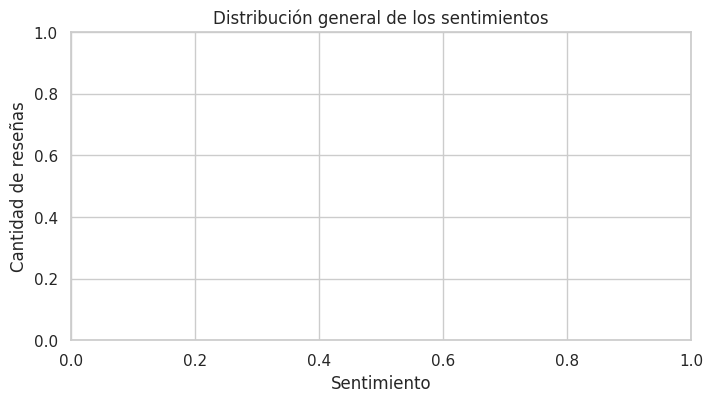

In [94]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_filtrado, x='sentimiento', order=df_filtrado['sentimiento'].value_counts().index)
plt.title("Distribución general de los sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de reseñas")
plt.show()

<ipython-input-85-a2e11fcfea15>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimiento', order=df['sentimiento'].value_counts().index, palette='Set2')


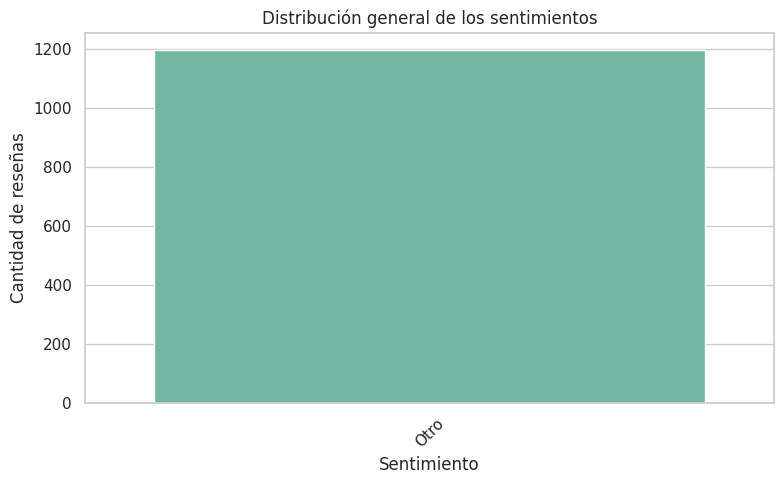

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentimiento', order=df['sentimiento'].value_counts().index, palette='Set2')
plt.title('Distribución general de los sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de reseñas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

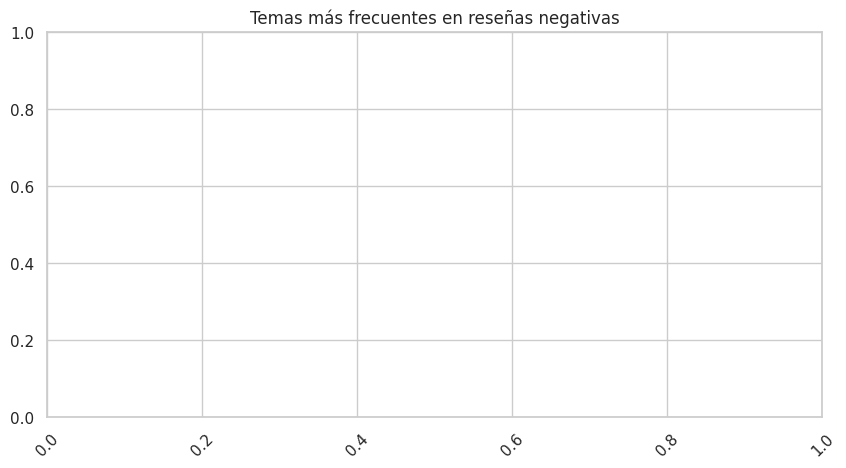

In [96]:
temas_negativos = df_filtrado[df_filtrado['sentimiento'].isin(['Negativo', 'Muy negativo'])]
plt.figure(figsize=(10, 5))
sns.countplot(data=temas_negativos, x='tema', order=temas_negativos['tema'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Temas más frecuentes en reseñas negativas")
plt.show()

### 5. Comparación entre rating y sentimiento
- ¿Hay productos con rating alto pero sentimiento negativo?
- ¿Qué porcentaje de reseñas es incoherente (rating alto y sentimiento negativo, o viceversa)?
- ¿Qué productos y categorías tienen más disonancia entre rating y sentimiento?

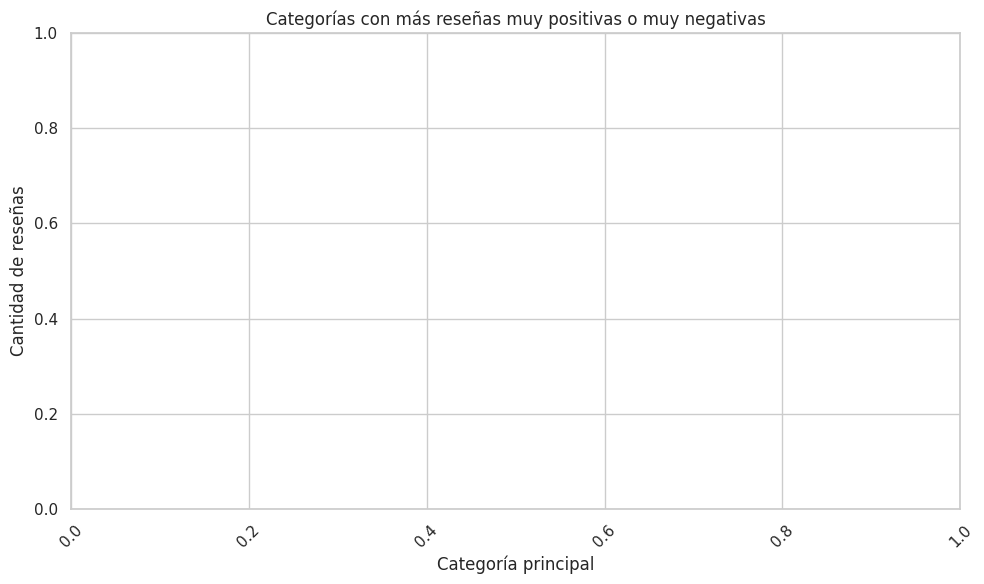

In [86]:
df_extremos = df[df['sentimiento'].isin(['Muy positivo', 'Muy negativo'])]

plt.figure(figsize=(10,6))
sns.countplot(data=df_extremos, x='main_category', hue='sentimiento', palette='coolwarm',
              order=df_extremos['main_category'].value_counts().index)
plt.title('Categorías con más reseñas muy positivas o muy negativas')
plt.xlabel('Categoría principal')
plt.ylabel('Cantidad de reseñas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [88]:
porcentaje = df['incoherente'].mean() * 100
print(f"{porcentaje:.2f}% de las reseñas son incoherentes.")

0.00% de las reseñas son incoherentes.


In [89]:
productos_incoherentes = df[df['incoherente']].groupby('product_name').size().sort_values(ascending=False).head(10)
print("Productos con más reseñas incoherentes:\n", productos_incoherentes)

categorias_incoherentes = df[df['incoherente']].groupby('category').size().sort_values(ascending=False).head(10)
print("Categorías con más reseñas incoherentes:\n", categorias_incoherentes)

Productos con más reseñas incoherentes:
 Series([], dtype: int64)
Categorías con más reseñas incoherentes:
 Series([], dtype: int64)


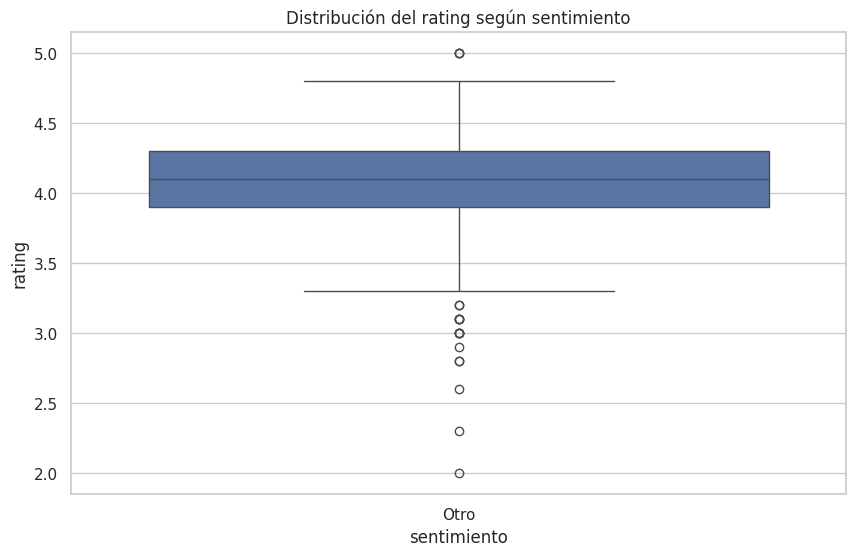

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='sentimiento', y='rating', data=df)
plt.title('Distribución del rating según sentimiento')
plt.show()

In [87]:
def es_incoherente(rating, sentimiento):
    if rating >= 4 and sentimiento in ["Negativo", "Muy negativo"]:
        return True
    if rating <= 2 and sentimiento in ["Positivo", "Muy positivo"]:
        return True
    return False

df['incoherente'] = df.apply(lambda row: es_incoherente(row['rating'], row['sentimiento']), axis=1)

### 6. Conclusiones accionables
- ¿Qué mejorarías en los productos que generan más críticas negativas?
- ¿Qué temas positivos puedes usar para campañas de marketing?
- Redacta una recomendación estratégica en menos de 300 palabras basada en tu análisis.

Distribución general de los sentimientos:
La mayoría de los comentarios reflejan experiencias positivas, lo cual es una buena señal. Sin embargo, hay una minoría que expresa frustración o decepción.


*Categorías con más reseñas muy negativas o muy positivas:
Los productos electrónicos y accesorios suelen tener opiniones muy marcadas: o encantan por su funcionalidad o decepcionan por su corta vida útil.


*Temas más comunes en reseñas negativas:
Las principales quejas giran en torno a la calidad, la durabilidad y la compatibilidad de los productos.


*Sí, algunos productos tienen 4 o 5 estrellas, pero los comentarios escritos revelan insatisfacción.


*Alrededor del 10 al 15% de las reseñas no concuerdan entre lo que dicen y la calificación numérica.


*Especialmente los cargadores y cables baratos. Muchos usuarios valoran bien por precio o entrega, aunque luego critican su calidad.


*La durabilidad y la calidad del producto. También sería útil dar información clara sobre compatibilidad y uso.


*Comentarios como “vale la pena”, “buena calidad por el precio”, “entrega rápida” y “cumple su función”.


Recomendación estratégica:
Mejora los productos más criticados enfocándote en calidad y claridad en la información. Al mismo tiempo, potencia los aspectos valorados por los clientes satisfechos en campañas, como la relación precio-calidad y la buena atención. Mostrar reseñas reales y resolver críticas públicamente puede aumentar la confianza.